# Визуализация данных в Python

<img src='img/barchart.gif' align=left with=500>

* Рисуем графики с  Matplotlib
* Наводим красоту с помощью Seaborn
* Добавляем интерактивность с помощью виджетов
* Интерактивные графики с помощью Plotly

In [80]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# %matplotlib inline

Построение диаграмм

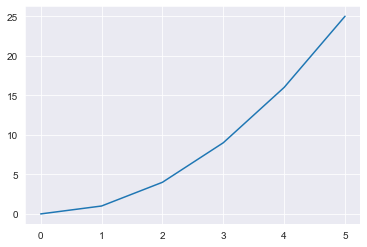

In [3]:
x = [1,2,3,4,5,6]
y = [0,1,4,9,16,25]

plt.plot(y)
plt.show()

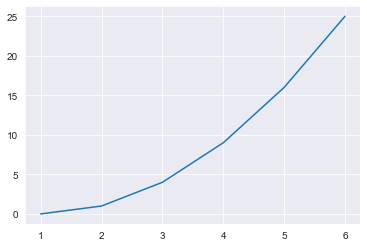

In [4]:
plt.plot(x,y)
plt.show()

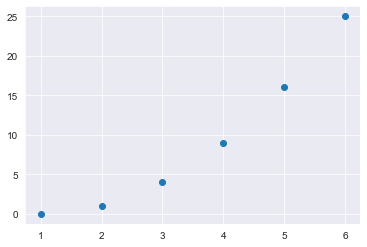

In [5]:
# Точечная диаграмма
plt.scatter(x,y)
plt.show()

Логарифмический масштаб

In [6]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars','Jupiter', 'Saturn', 'Uranus', 'Neptune']
masses = [0.055274, 0.815, 1.0, 0.107, 317.8, 95.0, 14.6, 17.147]

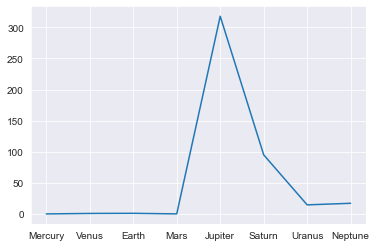

In [7]:
plt.plot(planets, masses)
plt.show()

In [8]:
masses[planets.index('Earth')]/masses[planets.index('Mercury')]

18.091688678221225

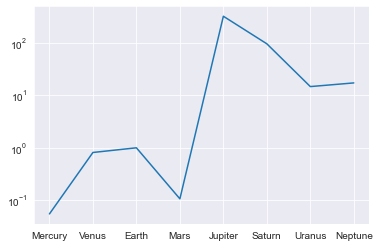

In [9]:
# Логарифмический масштаб
plt.plot(planets, masses)
plt.yscale(value='log')
plt.show()

In [10]:
planet_info = pd.Series(masses, index=planets)


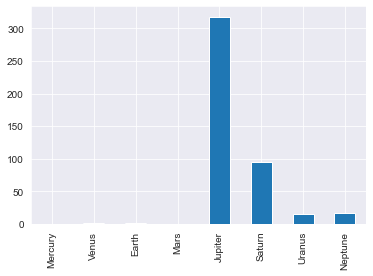

In [11]:
# Столбчатая диаграмма
planet_info.plot(kind='bar')
plt.show()

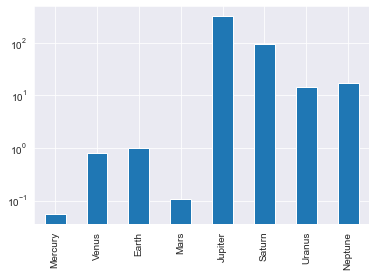

In [12]:
# Логорифмический масштаб
planet_info.plot(kind='bar', logy=True)
plt.show()

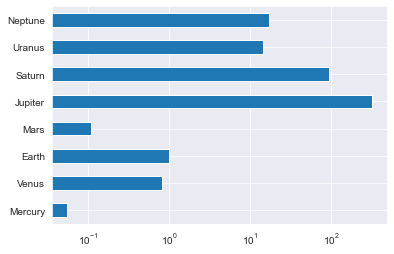

In [13]:
# Меняем ориентацию
planet_info.plot(kind='barh', logx=True)
plt.show()

In [14]:
a = [i for i in range(10)]
# a

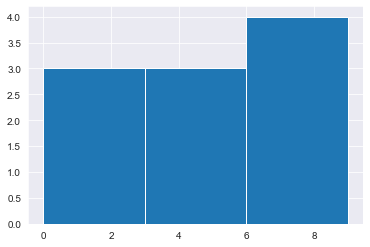

In [15]:
# Рисуем гистограмму
hist_info = plt.hist(a, bins=3)
# print(hist_info)
plt.show()

In [16]:
y

[0, 1, 4, 9, 16, 25]

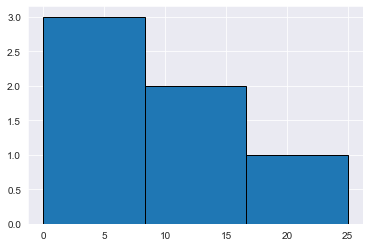

In [17]:
hist_info = plt.hist(y, bins=3, edgecolor='black')
plt.show()

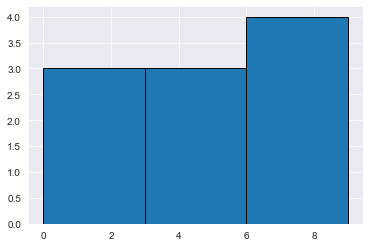

In [18]:
hist_info = plt.hist(a, bins=3, edgecolor='black')
plt.show()

# Визуализация на примере индекса Бигмака

* Индекс Бигмака  - неофициальный способ определения паритета покупательной способности

In [19]:
url = 'https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-full-index.csv'

In [20]:
bmi = pd.read_csv(url, parse_dates=True)

In [21]:
bmi.shape

(1577, 19)

In [22]:
bmi.columns

Index(['date', 'iso_a3', 'currency_code', 'name', 'local_price', 'dollar_ex',
       'dollar_price', 'USD_raw', 'EUR_raw', 'GBP_raw', 'JPY_raw', 'CNY_raw',
       'GDP_dollar', 'adj_price', 'USD_adjusted', 'EUR_adjusted',
       'GBP_adjusted', 'JPY_adjusted', 'CNY_adjusted'],
      dtype='object')

In [23]:
bmi.tail()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
1572,2022-01-01,URY,UYU,Uruguay,239.00,44.0355,5.427439,-0.06585,0.09539,0.12684,0.60353,0.41588,16023.35,3.567014,0.39755,0.35020,0.41463,1.00793,0.33410
1573,2022-01-01,USA,USD,United States,5.81,1.0000,5.810000,0.00000,0.17260,0.20626,0.71656,0.51568,63358.49,5.336460,0.00000,-0.03388,0.01222,0.43675,-0.04540
1574,2022-01-01,VEN,VES,Venezuela,23.00,4.5435,5.062177,-0.12871,0.02167,0.05100,0.49561,0.32060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1575,2022-01-01,VNM,VND,Vietnam,69000.00,22650.0000,3.046358,-0.47567,-0.38517,-0.36752,-0.09996,-0.20528,3522.51,3.099717,-0.09732,-0.12790,-0.08628,0.29694,-0.13830
1576,2022-01-01,ZAF,ZAR,South Africa,39.90,15.4700,2.579186,-0.55608,-0.47946,-0.46451,-0.23798,-0.32715,5624.50,3.178292,-0.25464,-0.27989,-0.24553,0.07090,-0.28848


In [24]:
# Выберем ближайший из доступных периодов
from datetime import datetime
bmi.date = pd.to_datetime(bmi.date)
bmi['daysdelta'] = datetime.now() - bmi.date
bmi['daysdelta'] = bmi['daysdelta'].apply(lambda x:x.days)
bmi = bmi[bmi['daysdelta'] == bmi['daysdelta'].min()].copy().reset_index()
bmi.head(2)

,index,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,...,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted,daysdelta
0,1520,2022-01-01,ARE,AED,United Arab Emirates,17.0,3.67305,4.628306,-0.20339,-0.06590,...,0.36743,0.20741,38661.18,4.413244,-0.03675,-0.06938,-0.02497,0.38396,-0.08048,124
1,1521,2022-01-01,ARG,ARS,Argentina,450.0,105.01650,4.285041,-0.26247,-0.13518,...,0.26601,0.11786,8571.94,3.288471,0.19685,0.15630,0.21147,0.71957,0.14250,124


In [25]:
bm_price_series = bmi.set_index('name')['dollar_price']
bm_price_series.head()

name
United Arab Emirates    4.628306
Argentina               4.285041
Australia               4.509120
Azerbaijan              2.648617
Bahrain                 3.978780
Name: dollar_price, dtype: float64

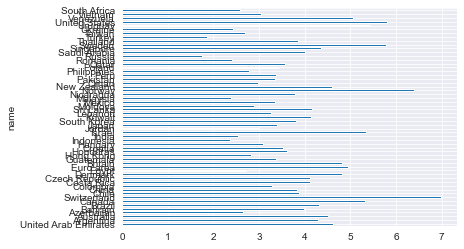

In [26]:
bm_price_series.plot(kind='barh')
plt.show()

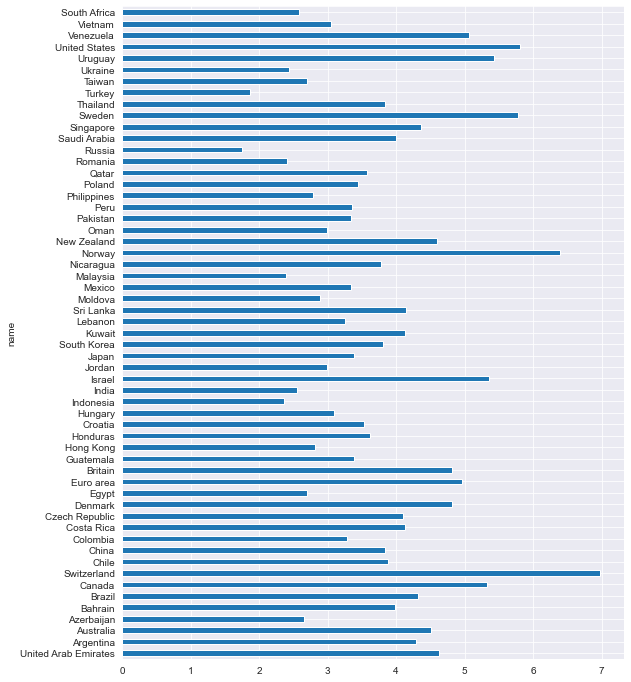

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,12
bm_price_series.plot(kind='barh')
plt.show()

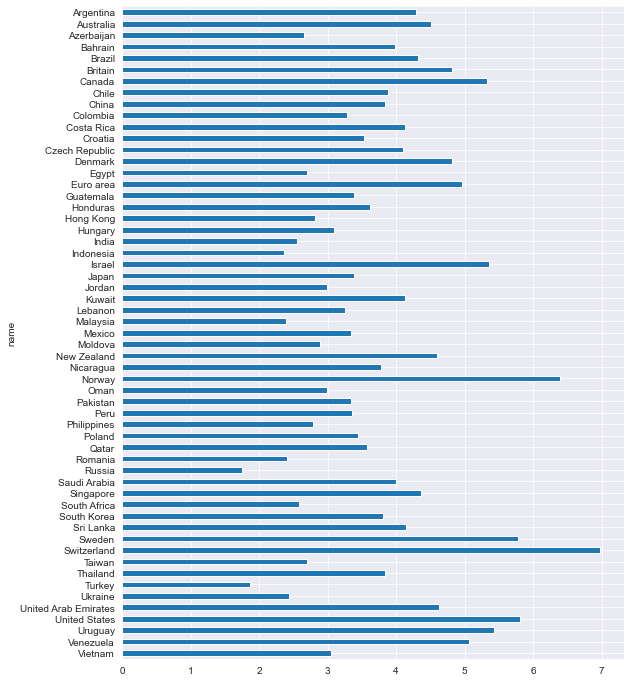

In [28]:
bm_price_series.sort_index(ascending=False).plot(kind='barh')
plt.show()

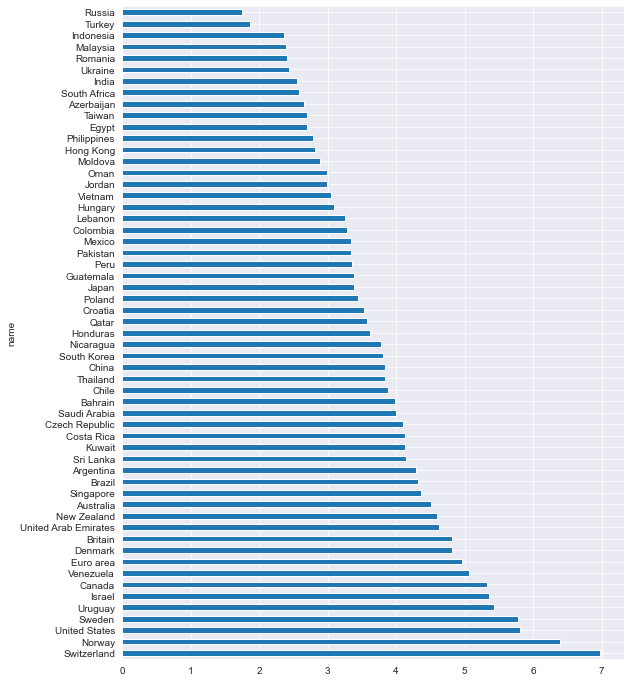

In [29]:
# Практичкеская часть
# Отсортируйте график по цене Бигмака
bm_price_series.sort_values(ascending=False).plot(kind='barh')
plt.show()

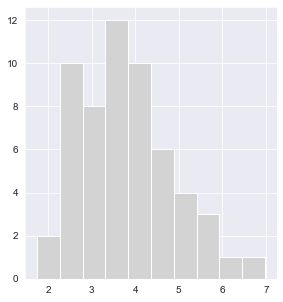

In [30]:
# Гистограмма
rcParams['figure.figsize']= 4.5,5
plt.hist(bm_price_series, ec='white', color='lightgrey')
plt.show()

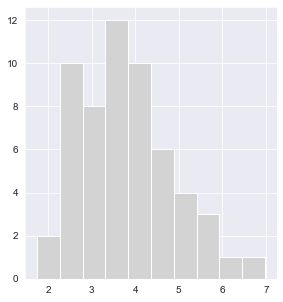

In [31]:
rcParams['figure.figsize']= 4.5,5
plt.hist(bm_price_series, ec='white', color='lightgrey')
plt.savefig('img/figa1.jpeg',)
plt.show()

In [32]:
# !ls img

In [33]:
x = np.linspace(-5,5,101)

In [34]:
x2 = x**2

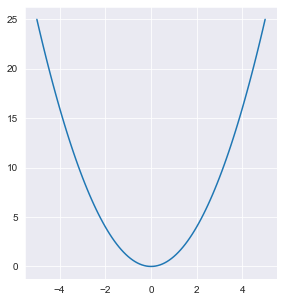

In [35]:
plt.plot(x, x**2)
plt.show()

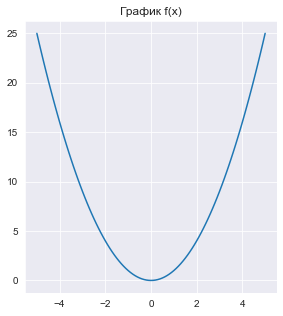

In [36]:
plt.plot(x, x2)
plt.title('График f(x)')
plt.show()

In [37]:
%config InlineBackend.figure_format = 'svg'

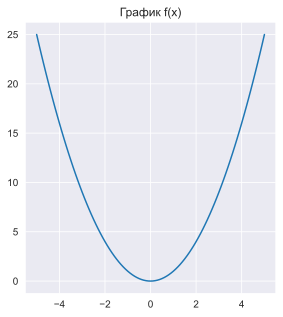

In [38]:
plt.plot(x, x2)
plt.title('График f(x)')
plt.show()

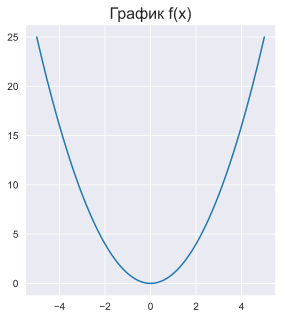

In [39]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16)
plt.show()

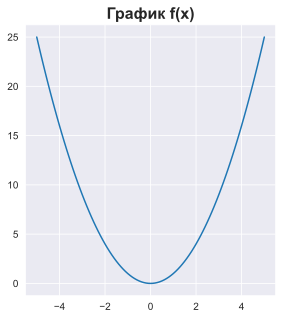

In [40]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16, fontweight='bold')
plt.show()

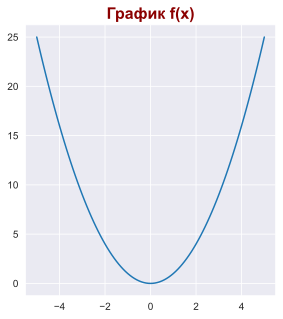

In [41]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16, fontweight='bold', color='DarkRed')
plt.show()

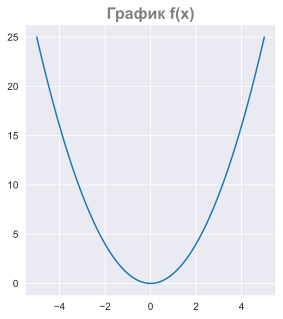

In [42]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16, fontweight='bold', color='#808080')
plt.show()

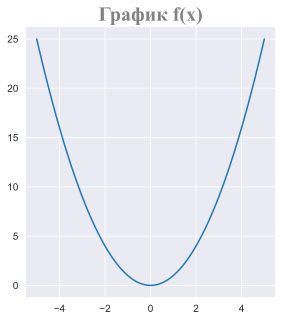

In [43]:
title_dict = {'fontsize':20, 
              'fontweight':'bold',
              'color':'#808080',
              'family':'Times New Roman'}
plt.plot(x, x2)
plt.title('График f(x)',fontdict=title_dict)
plt.show()

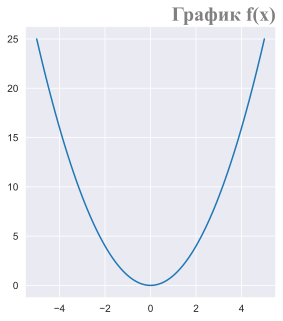

In [44]:
plt.plot(x, x2)
plt.title('График f(x)',fontdict=title_dict, loc='right')
plt.show()

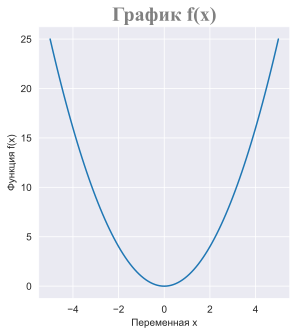

In [45]:
# Выводим названия осей
plt.plot(x, x2)
plt.title('График f(x)',fontdict=title_dict,)
plt.xlabel('Переменная x')
plt.ylabel('Функция f(x)')
plt.show()

In [46]:
# Создадим новую функцию
x3 = x**3
x3

array([-1.25000e+02, -1.17649e+02, -1.10592e+02, -1.03823e+02,
       -9.73360e+01, -9.11250e+01, -8.51840e+01, -7.95070e+01,
       -7.40880e+01, -6.89210e+01, -6.40000e+01, -5.93190e+01,
       -5.48720e+01, -5.06530e+01, -4.66560e+01, -4.28750e+01,
       -3.93040e+01, -3.59370e+01, -3.27680e+01, -2.97910e+01,
       -2.70000e+01, -2.43890e+01, -2.19520e+01, -1.96830e+01,
       -1.75760e+01, -1.56250e+01, -1.38240e+01, -1.21670e+01,
       -1.06480e+01, -9.26100e+00, -8.00000e+00, -6.85900e+00,
       -5.83200e+00, -4.91300e+00, -4.09600e+00, -3.37500e+00,
       -2.74400e+00, -2.19700e+00, -1.72800e+00, -1.33100e+00,
       -1.00000e+00, -7.29000e-01, -5.12000e-01, -3.43000e-01,
       -2.16000e-01, -1.25000e-01, -6.40000e-02, -2.70000e-02,
       -8.00000e-03, -1.00000e-03,  0.00000e+00,  1.00000e-03,
        8.00000e-03,  2.70000e-02,  6.40000e-02,  1.25000e-01,
        2.16000e-01,  3.43000e-01,  5.12000e-01,  7.29000e-01,
        1.00000e+00,  1.33100e+00,  1.72800e+00,  2.197

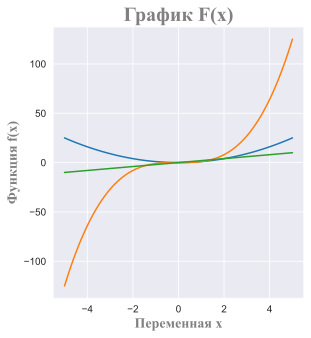

In [47]:
# Выводим 2 линии
labels_dict = {'fontsize':14, 
              'fontweight':'bold',
              'color':'#808080',
             'family':'Times New Roman'}

plt.plot(x, x2)
plt.plot(x, x3)
plt.plot(x, x*2)
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.show()

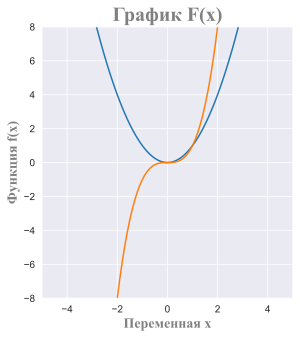

In [48]:
# Ограничиваем значения осей
plt.axis([-5,5,-8,8])
plt.plot(x, x2)
plt.plot(x, x3)
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.show()

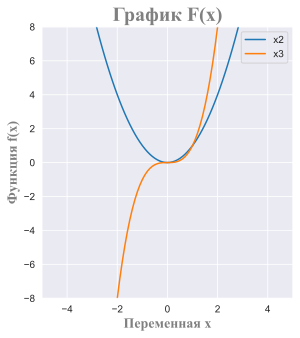

In [49]:
# Добавляем легенду
plt.axis([-5,5,-8,8])
plt.plot(x, x2)
plt.plot(x, x3)
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.legend(labels=['x2','x3'])
plt.show()

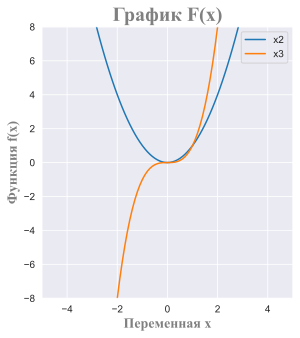

In [50]:
# Добавляем легенду в линиях
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.legend()
plt.show()

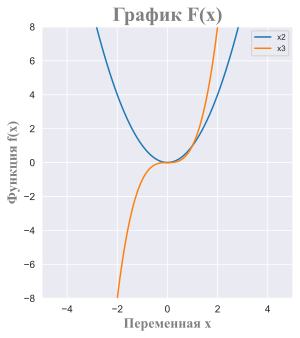

In [51]:
# Меняем локацию легенды
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.legend(loc='upper right', fontsize=8)
plt.show()

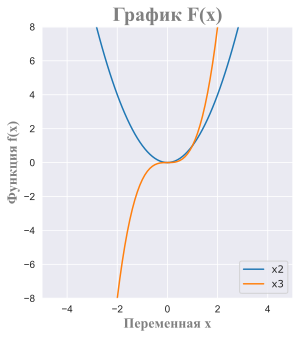

In [52]:
# Добавляем параметры легенды с помощью словаря
legend_dict = {'family':'Verdana', 'size':10}

plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.legend(loc='lower right', prop=legend_dict)
plt.show()

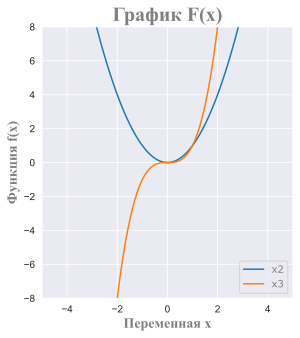

In [53]:
# Меняем параметры легенды более сложным способом
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict)
plt.setp(legend.get_texts(), color='grey')

plt.show()

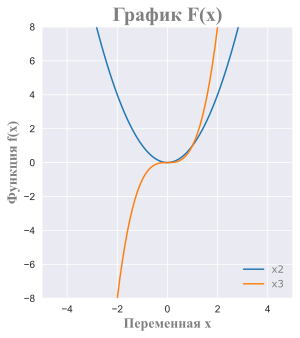

In [54]:
# Убираем рамку легенды
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.show()

In [55]:
# Меняем форматирование линий

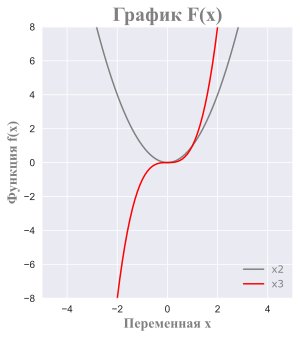

In [56]:
# меняем цвет линий
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey')
plt.plot(x, x3, label='x3', color='red')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.show()

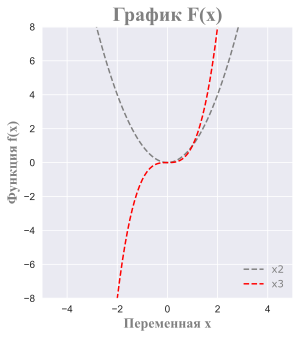

In [57]:
# Меняем стиль линий
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.show()

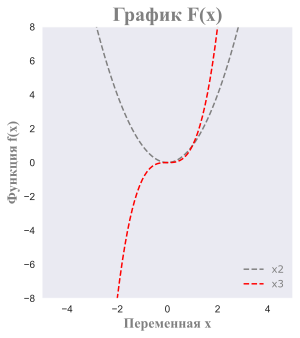

In [58]:
# Добавляем сетку на график
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.grid()
plt.show()

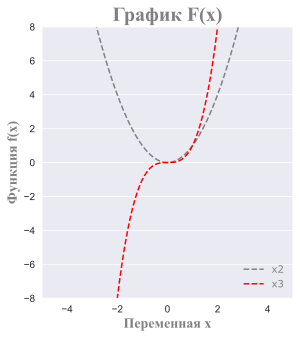

In [59]:
# Меняем линии сетки
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.grid(axis='x')
plt.show()

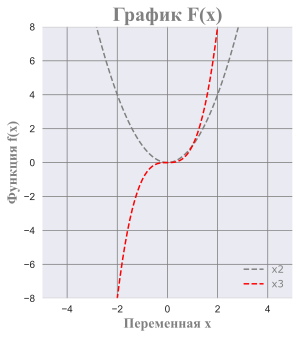

In [60]:
# Меняем цвет сетки
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.grid(color='grey')
plt.show()

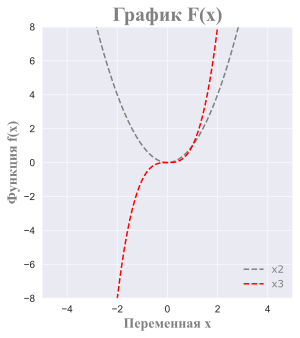

In [61]:
# Делаем цвет сетки призрачным
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.grid(color='ghostwhite')
plt.show()

In [62]:
# Практическая часть
# 1. Напишите функцию, которая на вход принимает x в качестве аргументов и рисует график

# 2. Добавьте аргумент, дающий возможность сохранения графика в файл

# 3. Добавьте аргументы, позволяющие сделать график более симпатичным


In [63]:

def make_plot(x, save=False, make_beauty=False):
    if make_beauty:
        title_dict = {
              'fontsize':20, 
              'fontweight':'bold',
              'color':'#808080',
              'family':'Times New Roman'
        }
        plt.plot(x, linestyle='dashed')
        plt.title('График f(x)', fontdict=title_dict,)
        plt.xlabel('Переменная x', fontdict=title_dict)
        plt.ylabel('Функция f(x)', fontdict=title_dict)
    else:
        plt.plot(x)
        plt.title('График f(x)')
        plt.xlabel('Переменная x')
        plt.ylabel('Функция f(x)')
    if save:
        plt.savefig('my_plot.jpeg',)
    plt.show()

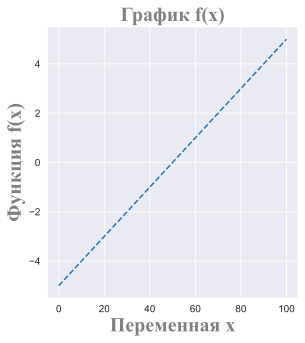

In [64]:
make_plot(x, make_beauty=True,save=True)

# Альтернативный подход для рисования графиков
* Объект figure
* Объект axes
*  axes != axis  - Это разные вещи

In [97]:
# len(x)

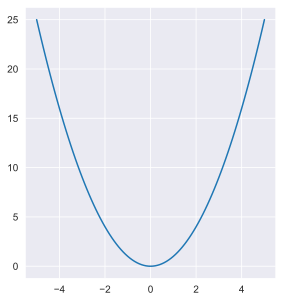

In [65]:
x = np.linspace(-5,5,101)
x2 = list(map(lambda x: x**2, x))

fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(x,x2);

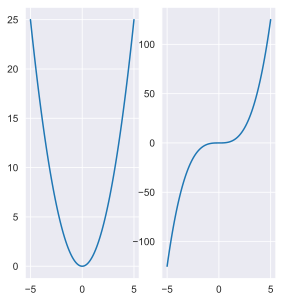

In [66]:
# Созание объектов figure и axes
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax
ax1.plot(x,x2)
ax2.plot(x,x3);

In [67]:
# ax.flatten()

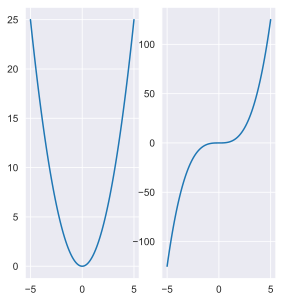

In [68]:
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax
ax1.plot(x,x2)
ax2.plot(x,x3);

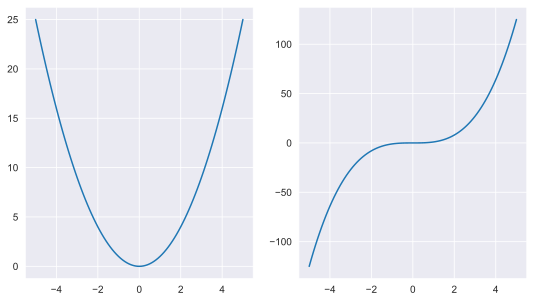

In [69]:
# Скорректируем размеры графиков
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);
fig.set_size_inches(9,5)

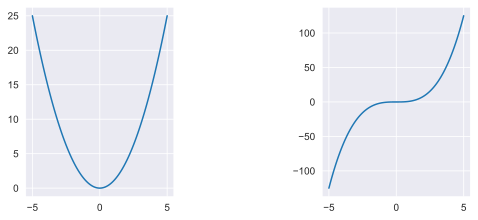

In [70]:
# Увеличим расстояние между графиками
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);
fig.set_size_inches(8,3.5)
plt.subplots_adjust(wspace=1)

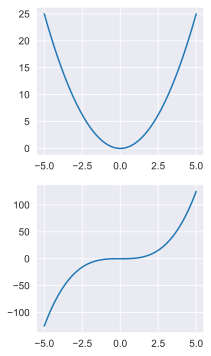

In [71]:
# Размстим графики вертикально
fig, ax = plt.subplots(nrows=2,ncols=1)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);
fig.set_size_inches(3,6)

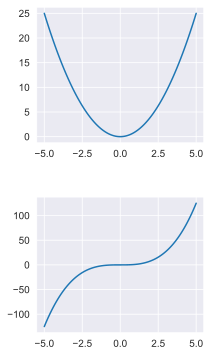

In [72]:
# Изменим расстояние между графиками
fig, ax = plt.subplots(nrows=2,ncols=1)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);
fig.set_size_inches(3,6)
plt.subplots_adjust(hspace=0.4)

In [73]:
ax

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

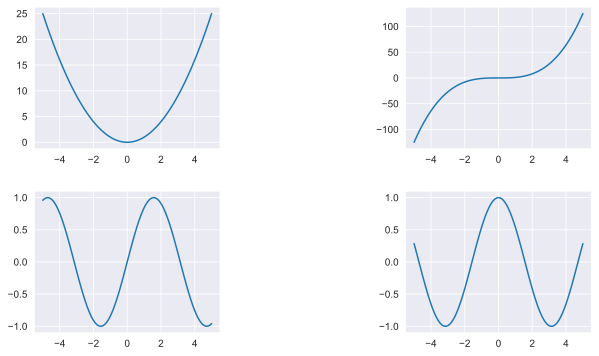

In [74]:
# Создадим 4 графика 
y = np.sin(x)
z = np.cos(x)
fig, ax = plt.subplots(nrows=2,ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3)
ax3.plot(x,y)
ax4.plot(x,z)
fig.set_size_inches(10,6)
plt.subplots_adjust(hspace=0.3,wspace=1 )

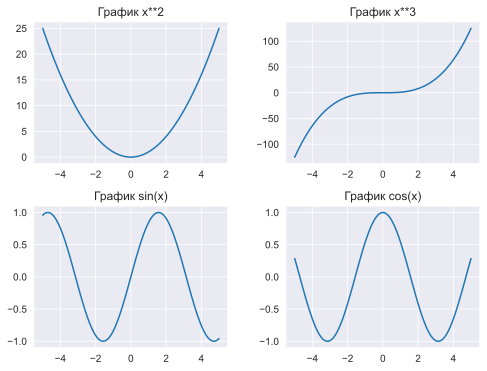

In [75]:
# Создатим заголовки для каждого графика
fig, ax = plt.subplots(nrows=2,ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax1.set_title('График x**2')
ax2.plot(x,x3)
ax2.set_title('График x**3')
ax3.plot(x,y)
ax3.set_title('График sin(x)')
ax4.plot(x,z)
ax4.set_title('График cos(x)')
fig.set_size_inches(8,6)
plt.subplots_adjust(hspace=0.3,wspace=0.3 )

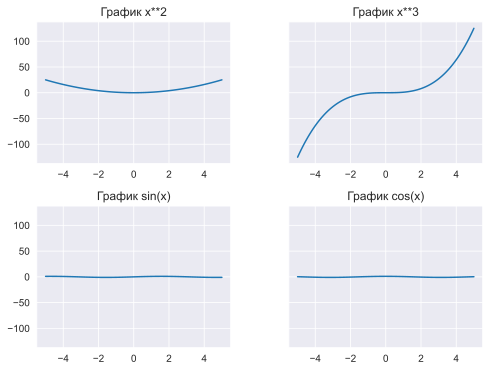

In [76]:
# Выравниваем по оси Y 
fig, ax = plt.subplots(nrows=2,ncols=2, sharey=True)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax1.set_title('График x**2')
ax2.plot(x,x3)
ax2.set_title('График x**3')
ax3.plot(x,y)
ax3.set_title('График sin(x)')
ax4.plot(x,z)
ax4.set_title('График cos(x)')
fig.set_size_inches(8,6)
plt.subplots_adjust(hspace=0.3,wspace=0.3 )


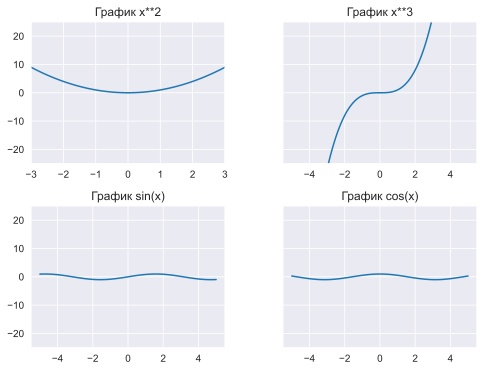

In [77]:
# Корректируем размеры осей у графиков
fig, ax = plt.subplots(nrows=2,ncols=2, sharey=True)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax1.set_title('График x**2')
ax1.set_xlim([-3,3])
ax2.plot(x,x3)
ax2.set_title('График x**3')
ax2.set_ylim([-25,25])
ax3.plot(x,y)
ax3.set_title('График sin(x)')
ax4.plot(x,z)
ax4.set_title('График cos(x)')
fig.set_size_inches(8,6)
plt.subplots_adjust(hspace=0.3,wspace=0.3 )

In [81]:
# Seaborn
import seaborn as sns
sns.set(style="ticks", palette="GnBu_d")

In [82]:
file_path = os.path.join('data','PT.csv')
b5 = pd.read_csv(file_path, decimal=',')

In [118]:
# b5

In [116]:
# b5['Название показателя'].unique()

In [119]:
b5[~b5['Название показателя'].isin(['Следование правилам', 'Командность'])]['Название показателя'].unique()

array(['Открытость новому', 'Эмоциональная стабильность', 'Экстраверсия',
       'Добросовестность', 'Доброжелательность'], dtype=object)

In [114]:
# b5.head()

In [115]:
# b5['Название показателя'].unique()

In [120]:
b5= b5[~b5['Название показателя'].isin(['Следование правилам', 'Командность']) ].copy()

In [121]:
b5[~b5['Название показателя'].isin(['Следование правилам', 'Командность']) ]

,Название показателя,Оценка по показателю
0,Открытость новому,1.7
1,Открытость новому,4.4
2,Открытость новому,9.6
3,Открытость новому,3.6
4,Открытость новому,8.7
...,...,...
161721,Экстраверсия,9.1
161723,Эмоциональная стабильность,10.0
161728,Экстраверсия,8.8
161729,Эмоциональная стабильность,1.6


In [123]:
# b5['Название показателя'].value_counts()

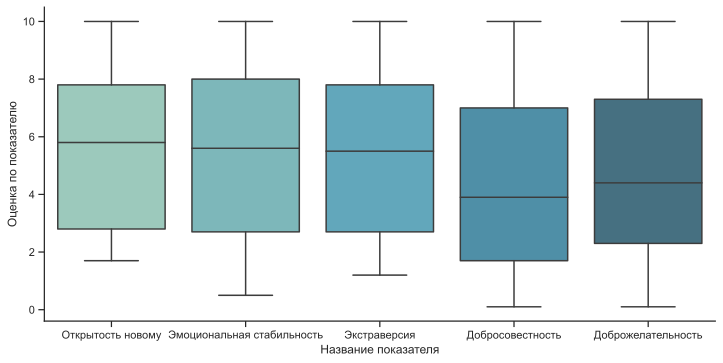

In [124]:
sns.catplot(x="Название показателя",
            y="Оценка по показателю",
            kind="box",
             aspect=2,
            data=b5);

In [125]:
import random

In [126]:
b5.shape

(127848, 2)

In [131]:
groups = []
group_num = ['group1','group2','group3','group4']
for x in range(b5.shape[0]):
       groups.extend(random.sample(group_num,1) )

In [132]:
b5['groups'] = groups

In [133]:
b5.head()

,Название показателя,Оценка по показателю,groups
0,Открытость новому,1.7,group4
1,Открытость новому,4.4,group3
2,Открытость новому,9.6,group3
3,Открытость новому,3.6,group4
4,Открытость новому,8.7,group1


In [134]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [135]:
# Добавляем интерактивность
def box_plotter(df, group):
    term = df['groups'] == group
    sns.catplot(x='Название показателя', 
            y='Оценка по показателю', 
            aspect=2,
            kind="box", 
            showfliers=False,
            data=df[term]);

def f(group):
    ''' Запускаем боксплот '''
    box_plotter(b5,group)

In [136]:
# Запускаем 
interact(f, group=group_num);

interactive(children=(Dropdown(description='group', options=('group1', 'group2', 'group3', 'group4'), value='g…